**Titanic - Machine Learning from Disaster**

In this challenge, I am building a predictive model that analysis “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [13]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [133]:
# Load the datasets required for the Titanic machine learning challenge
# - 'train.csv': Contains training data with features and survival labels.
# - 'test.csv': Contains test data with features but no survival labels.
# - 'gender_submission.csv': Contains sample submission data showing how to format predictions for gender.
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [134]:
#first 10 rows of train data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [135]:
#first 10 rows of test data
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [138]:
#print info of train data
(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
#data types
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [23]:
# Example: Handling missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Example: Convert categorical variables into numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Example: Feature engineering
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [25]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [162]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Define features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']

# Map 'male' to 0 and 'female' to 1
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), ['Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
        ]), ['Pclass', 'Sex', 'Embarked'])
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [163]:
#first 10 rows of gender_submission.csv
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [164]:
# Printing age less than 40 with passengerID less than 900
test.loc[(test["Age"] < 40) & (test["PassengerId"] < 900)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [165]:
#print survival rate of male with passengerID is less than 900
gender_submission.loc[(gender_submission["Survived"] == 0) & (gender_submission["PassengerId"] < 900)]

,PassengerId,Survived
0,892,0
2,894,0
3,895,0
5,897,0
7,899,0


In [166]:
#print survival rate of female with passengerID is less than 900
gender_submission.loc[(gender_submission["Survived"] == 1) & (gender_submission["PassengerId"] < 900)]

,PassengerId,Survived
1,893,1
4,896,1
6,898,1


<Axes: xlabel='Survived'>

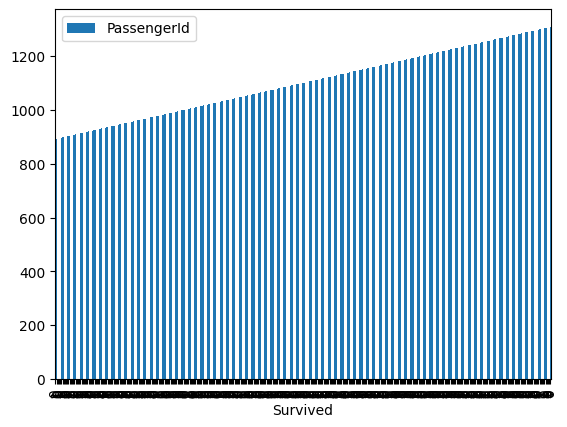

In [167]:
#visualise survived with passengerID data
gender_submission.plot.bar(x = 'Survived', y = 'PassengerId')

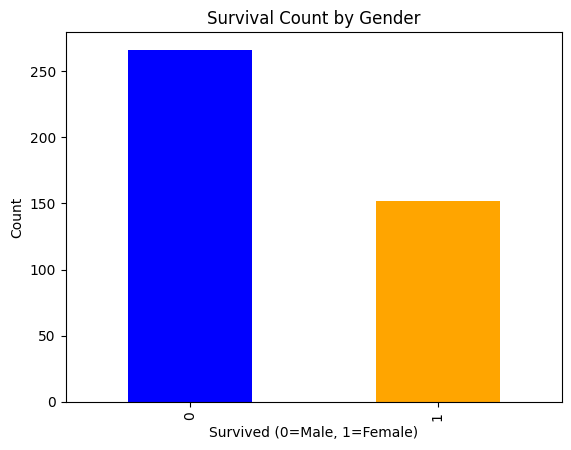

In [168]:
# Assuming gender_submission is your DataFrame
survived_counts = gender_submission['Survived'].value_counts()

# Plotting the bar graph
survived_counts.plot(kind='bar', title='Survival Count by Gender', xlabel='Survived (0=Male, 1=Female)', ylabel='Count', color=['blue', 'orange'])
plt.show()

Now we can see that male survival rate is higher than female

In [169]:
# Load the data
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Map 'male' to 0 and 'female' to 1 in the 'Sex' column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Filter the DataFrame to include only males in Pclass 1, Pclass 2 and Pclass 3
males_in_pclass_1 = test[(test['Pclass'] == 1) & (test['Sex'] == 0)]
males_in_pclass_2 = test[(test['Pclass'] == 2) & (test['Sex'] == 0)]
males_in_pclass_3 = test[(test['Pclass'] == 3) & (test['Sex'] == 0)]

# Count the number of males in Pclass 1, Pclass 2 and Pclass 3
num_males_in_pclass_1 = males_in_pclass_1.shape[0]
num_males_in_pclass_2 = males_in_pclass_2.shape[0]
num_males_in_pclass_3 = males_in_pclass_3.shape[0]

print(f'The number of males in Pclass 1 is: {num_males_in_pclass_1}')
print(f'The number of males in Pclass 2 is: {num_males_in_pclass_2}')
print(f'The number of males in Pclass 3 is: {num_males_in_pclass_3}')

The number of males in Pclass 1 is: 57
The number of males in Pclass 2 is: 63
The number of males in Pclass 3 is: 146


The number of male in Pclass 3 is more than other classes

In [170]:
# Load the data
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Map 'male' to 0 and 'female' to 1 in the 'Sex' column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Filter the DataFrame to include only females in Pclass 1, Pclass 2 and Pclass 3
females_in_pclass_1 = test[(test['Pclass'] == 1) & (test['Sex'] == 1)]
females_in_pclass_2 = test[(test['Pclass'] == 2) & (test['Sex'] == 1)]
females_in_pclass_3 = test[(test['Pclass'] == 3) & (test['Sex'] == 1)]

# Count the number of females in Pclass 1, Pclass 2 and Pclass 3
num_females_in_pclass_1 = females_in_pclass_1.shape[0]
num_females_in_pclass_2 = females_in_pclass_2.shape[0]
num_females_in_pclass_3 = females_in_pclass_3.shape[0]

print(f'The number of females in Pclass 1 is: {num_females_in_pclass_1}')
print(f'The number of females in Pclass 2 is: {num_females_in_pclass_2}')
print(f'The number of females in Pclass 3 is: {num_females_in_pclass_3}')

The number of females in Pclass 1 is: 50
The number of females in Pclass 2 is: 30
The number of females in Pclass 3 is: 72


The number of female in Pclass 3 is more than other classes

In [171]:
# Assuming gender_submission is your DataFrame
survived_counts = gender_submission['Survived'].value_counts()
print(survived_counts)

Survived
0    266
1    152
Name: count, dtype: int64


Here we can see that male survival rate is higher than women.

In [172]:
#find the mean of survival rate in Pclass 1, 2 and 3
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()

# Print the results
print(survival_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [173]:
#print survival values of both male and female in Pclass 1, 2 and 3
survival_counts_by_pclass = train.groupby('Pclass')['Survived'].sum()

# Print the results
print(survival_counts_by_pclass)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [174]:
# Load the dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived'
# This will give the total number of survivors for each combination of class and gender
survival_counts_by_pclass_and_sex = train.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Print the results
print(survival_counts_by_pclass_and_sex)

Pclass  Sex
1       0      45
        1      91
2       0      17
        1      70
3       0      47
        1      72
Name: Survived, dtype: int64


Here we can compare the survival rate of male and female in Pclass 1, 2 and 3 for make and female individually.

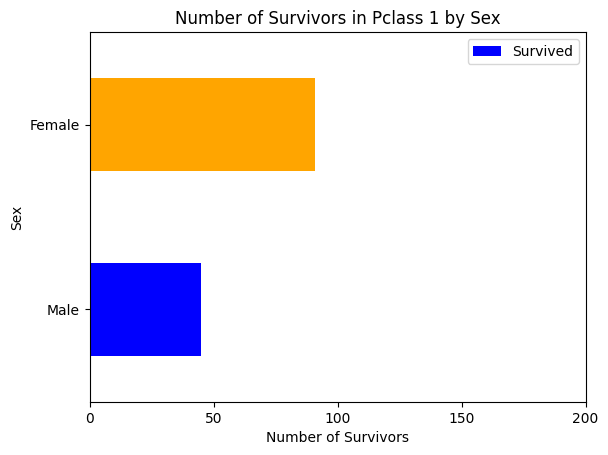

In [175]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived'
survival_counts_by_pclass_and_sex = train.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Convert the Series to a DataFrame
survival_df = survival_counts_by_pclass_and_sex.reset_index()

# Filter for Pclass 1 only
pclass_1_survival_df = survival_df[survival_df['Pclass'] == 1]

# Plotting the horizontal bar graph
ax = pclass_1_survival_df.plot(kind='barh', x='Sex', y='Survived', color=['blue', 'orange'])
plt.title('Number of Survivors in Pclass 1 by Sex')
plt.xlabel('Number of Survivors')
plt.ylabel('Sex')
plt.xticks([0, 50, 100, 150, 200])  # Adjust as needed
plt.yticks([0, 1], ['Male', 'Female'])
plt.show()

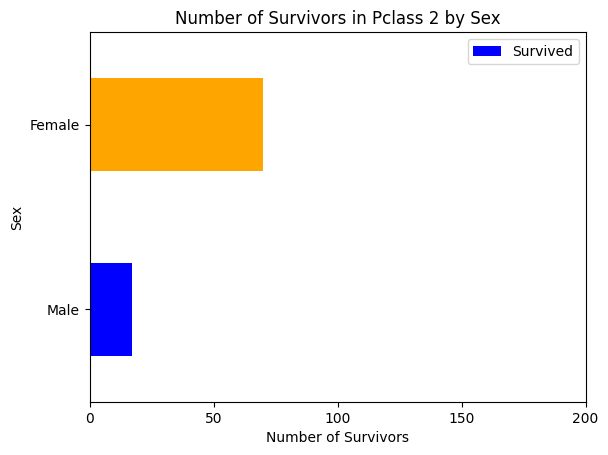

In [176]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived'
survival_counts_by_pclass_and_sex = train.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Convert the Series to a DataFrame
survival_df = survival_counts_by_pclass_and_sex.reset_index()

# Filter for Pclass 2 only
pclass_1_survival_df = survival_df[survival_df['Pclass'] == 2]

# Plotting the horizontal bar graph
ax = pclass_1_survival_df.plot(kind='barh', x='Sex', y='Survived', color=['blue', 'orange'])
plt.title('Number of Survivors in Pclass 2 by Sex')
plt.xlabel('Number of Survivors')
plt.ylabel('Sex')
plt.xticks([0, 50, 100, 150, 200])  # Adjust as needed
plt.yticks([0, 1], ['Male', 'Female'])
plt.show()

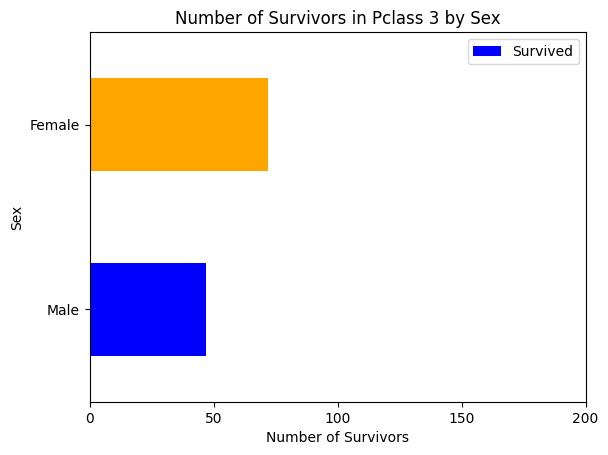

In [177]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived'
survival_counts_by_pclass_and_sex = train.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Convert the Series to a DataFrame
survival_df = survival_counts_by_pclass_and_sex.reset_index()

# Filter for Pclass 3 only
pclass_1_survival_df = survival_df[survival_df['Pclass'] == 3]

# Plotting the horizontal bar graph
ax = pclass_1_survival_df.plot(kind='barh', x='Sex', y='Survived', color=['blue', 'orange'])
plt.title('Number of Survivors in Pclass 3 by Sex')
plt.xlabel('Number of Survivors')
plt.ylabel('Sex')
plt.xticks([0, 50, 100, 150, 200])  # Adjust as needed
plt.yticks([0, 1], ['Male', 'Female'])
plt.show()

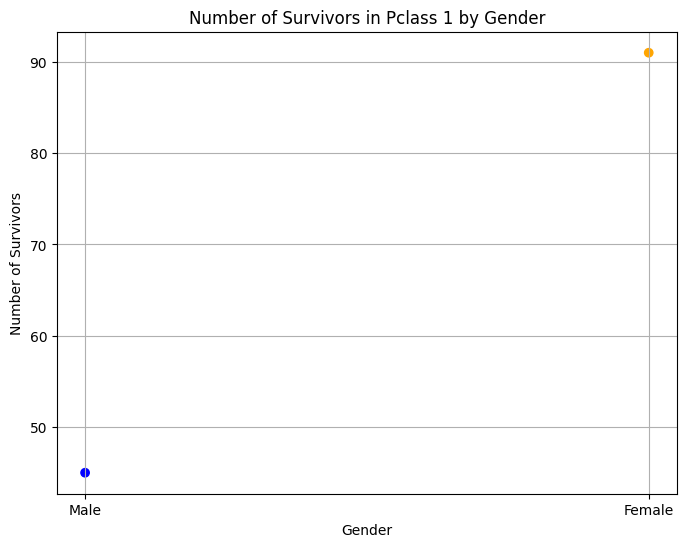

In [178]:
# Load the dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived'
survival_counts_by_pclass_and_sex = train.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Convert the Series to a DataFrame
survival_df = survival_counts_by_pclass_and_sex.reset_index()

# Filter for Pclass 1 only
pclass_1_survival_df = survival_df[survival_df['Pclass'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pclass_1_survival_df['Sex'], pclass_1_survival_df['Survived'], color=['blue', 'orange'])
plt.title('Number of Survivors in Pclass 1 by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.xticks([0, 1], ['Male', 'Female'])
plt.grid(True)
plt.show()